In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers


In [4]:
# Define the LeNet network
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = models.Sequential()
        # CONV => RELU => POOL
        model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(layers.Conv2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation="softmax"))
        return model

In [5]:
# Network and training parameters
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = optimizers.Adam()
VALIDATION_SPLIT = 0.1


2023-10-21 22:56:33.285849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-21 22:56:33.286347: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

In [7]:
# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [8]:
# Initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)               4

In [11]:
# Train the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
422/422 [==============================] - 9s 21ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0616 - val_accuracy: 0.9893
Epoch 2/20
422/422 [==============================] - 8s 20ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0338 - val_accuracy: 0.9935
Epoch 3/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0417 - val_accuracy: 0.9930
Epoch 4/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0456 - val_accuracy: 0.9913
Epoch 5/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0434 - val_accuracy: 0.9932
Epoch 6/20
422/422 [==============================] - 8s 20ms/step - loss: 8.6683e-04 - accuracy: 0.9997 - val_loss: 0.0442 - val_accuracy: 0.9932
Epoch 7/20
422/422 [==============================] - 9s 21ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0527 - val_accuracy: 0.

In [10]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9922

Test score: 0.035807978361845016
Test accuracy: 0.9922000169754028


In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
def plot_images(images, true_labels, predicted_labels=None):
    assert len(images) == len(true_labels) == 9
    
    # Create a 3x3 subplots
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()

    for i in np.arange(0, 9):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title("True: %d" % np.argmax(true_labels[i]), fontsize=16)
        if predicted_labels is not None:
            axes[i].set_xlabel("Predicted: %d" % np.argmax(predicted_labels[i]), fontsize=12)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)


313/313 [==============================] - 2s 6ms/step


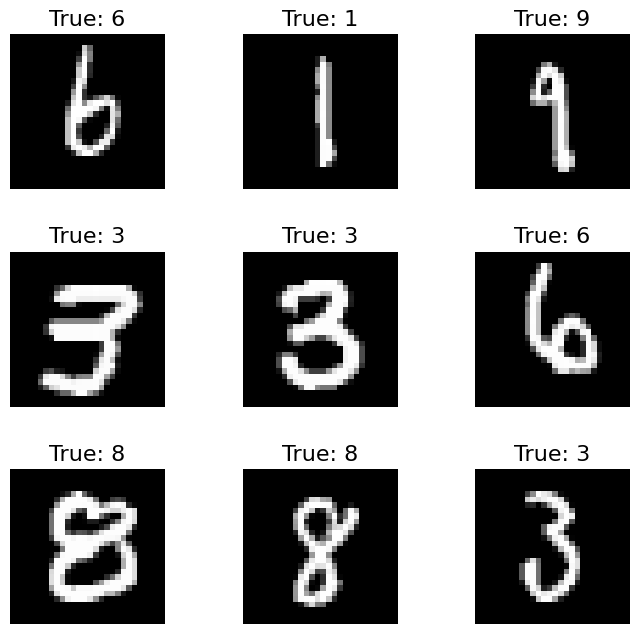

In [14]:
# Make predictions on the test set
predicted_labels = model.predict(X_test)

# Select 9 random test images and their true labels
indices = np.random.choice(len(X_test), 9)
images = X_test[indices]
true_labels = y_test[indices]

# Plot the images and labels
plot_images(images, true_labels, predicted_labels=predicted_labels[indices])
plt.show()
